In [1]:
# !pip install ipywidgets
# !pip install lightgbm
# !pip install torch
# !pip install catboost

In [2]:
import pandas as pd
import urllib.parse
import matplotlib.pyplot as plt
import numpy as np
import ffkkmo_ra
import ipywidgets as widgets


Получим датасет

In [3]:
df = pd.read_csv("ffkkmo_clean.csv", index_col='Unnamed: 0')
df_judges = pd.read_csv("ffkkmo_judges_clean.csv", index_col='Unnamed: 0')

In [4]:
clubs = sorted(list(filter(lambda x : isinstance(x, str), df.club.unique())))
categoies = df.category.unique()
club = widgets.Dropdown(
    options=clubs,
    value=clubs[0],
    description='Школа:',
    disabled=False,
)
category = widgets.Dropdown(
    options=categoies,
    value=categoies[0],
    description='Разряд:',
    disabled=False,
)
limit_val = widgets.IntSlider(
    value=50,
    min=0,
    max=200,
    step=1,
    description='Количество:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
season = widgets.Dropdown(
    options=[2021, 2122, 2223, 2324, 2425],
    value=2425,
    description='Сезон:',
    disabled=False,
)

In [5]:
display(club)
display(category)
display(season)
display(limit_val)

Dropdown(description='Школа:', options=('Балашиха, АНО ДЮСШ «Олимп»', 'Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина…

Dropdown(description='Разряд:', options=('3-й юношеский разряд, мальчики', '3-й юношеский разряд, девочки', '2…

Dropdown(description='Сезон:', index=4, options=(2021, 2122, 2223, 2324, 2425), value=2425)

IntSlider(value=50, continuous_update=False, description='Количество:', max=200)

In [6]:
ffkkmo_ra.get_top_df(df, 5)

club
Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»                    2495
Щелково, МАУ ГОЩ «ФОК «Ледовая арена» им. В.А. Третьяка     1976
Одинцово, МБУ ДО СШ «Одинцово»                              1911
Лыткарино, МАУ «ЛСК Лыткарино»                              1844
Наро-Фоминский, МАУ ДО ЦСШ №1                               1664
Остальные                                                  21287
Name: count, dtype: int64

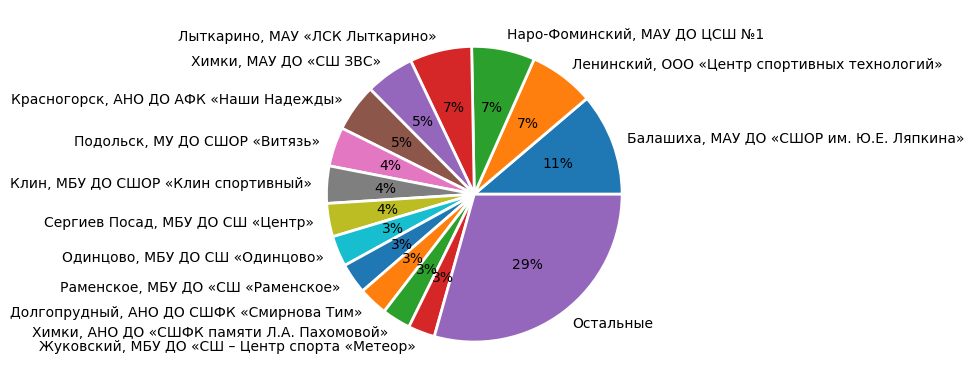

In [7]:
ffkkmo_ra.pie_of_winners(df, 2425, 3, 14, "Доля призеров в сезоне 24-25")
plt.title("", fontsize=16)
plt.xlabel("", fontsize=18)
plt.ylabel("", fontsize=18);

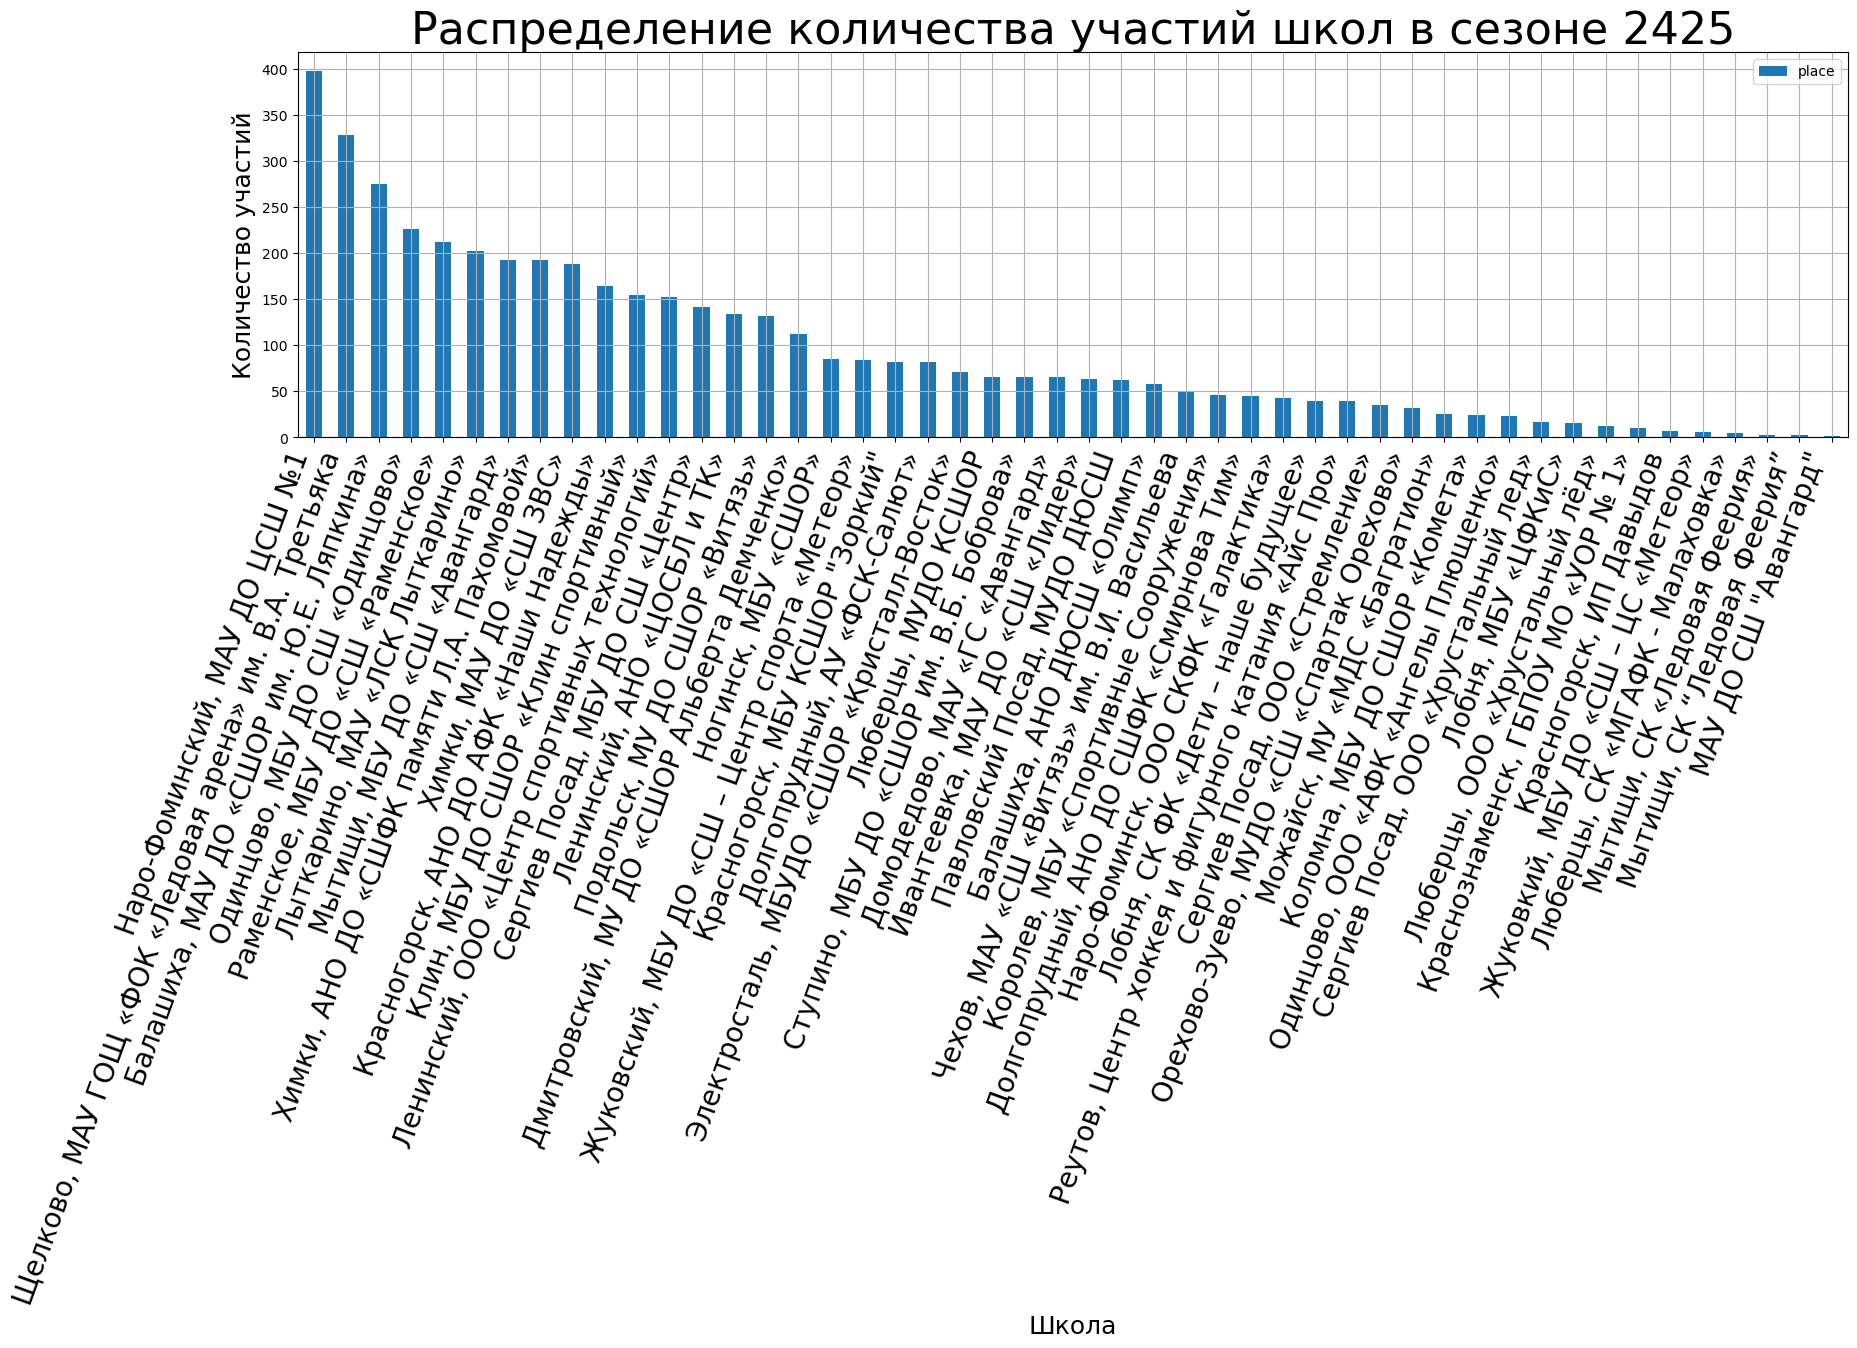

In [8]:
ffkkmo_ra.plot_clubs_in_season(df, season.value, limit_val.value, None)

Empty DataFrame
Columns: [date, firstname, lastname, club, place, online, category, segment, rank, middlename, tss, tes, pcs, year, month, season, label]
Index: []

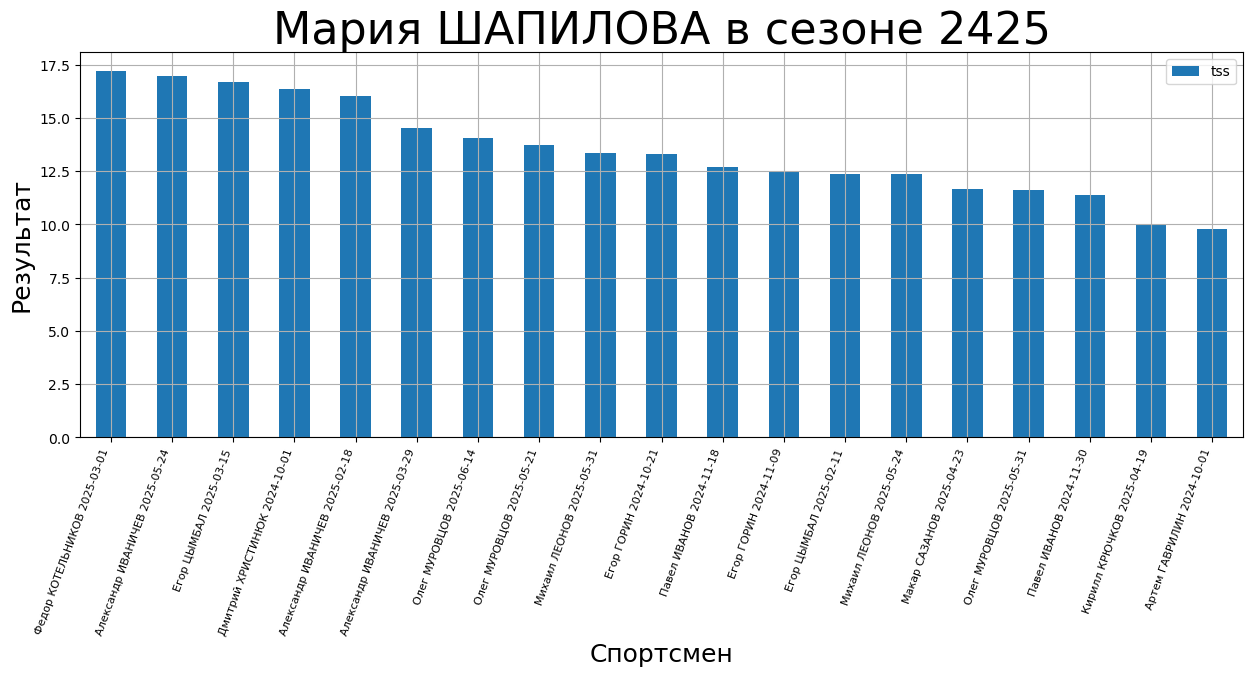

In [9]:
ffkkmo_ra.sportsmen_rating_in_season(df, season.value, category.value, 'Мария', 'ШАПИЛОВА', limit=limit_val.value)

Empty DataFrame
Columns: [date, firstname, lastname, club, place, online, category, segment, rank, middlename, tss, tes, pcs, year, month, season, label]
Index: []

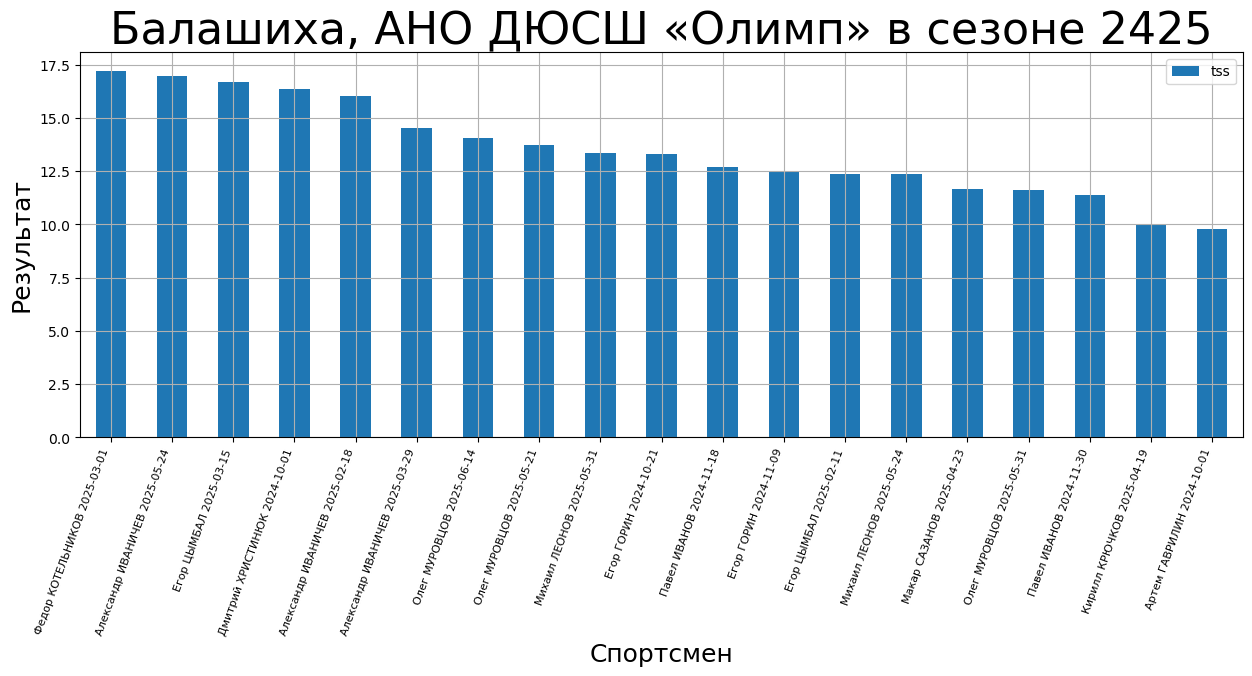

In [10]:
ffkkmo_ra.club_rating_in_season(df, season.value, category.value, club.value, limit=limit_val.value)

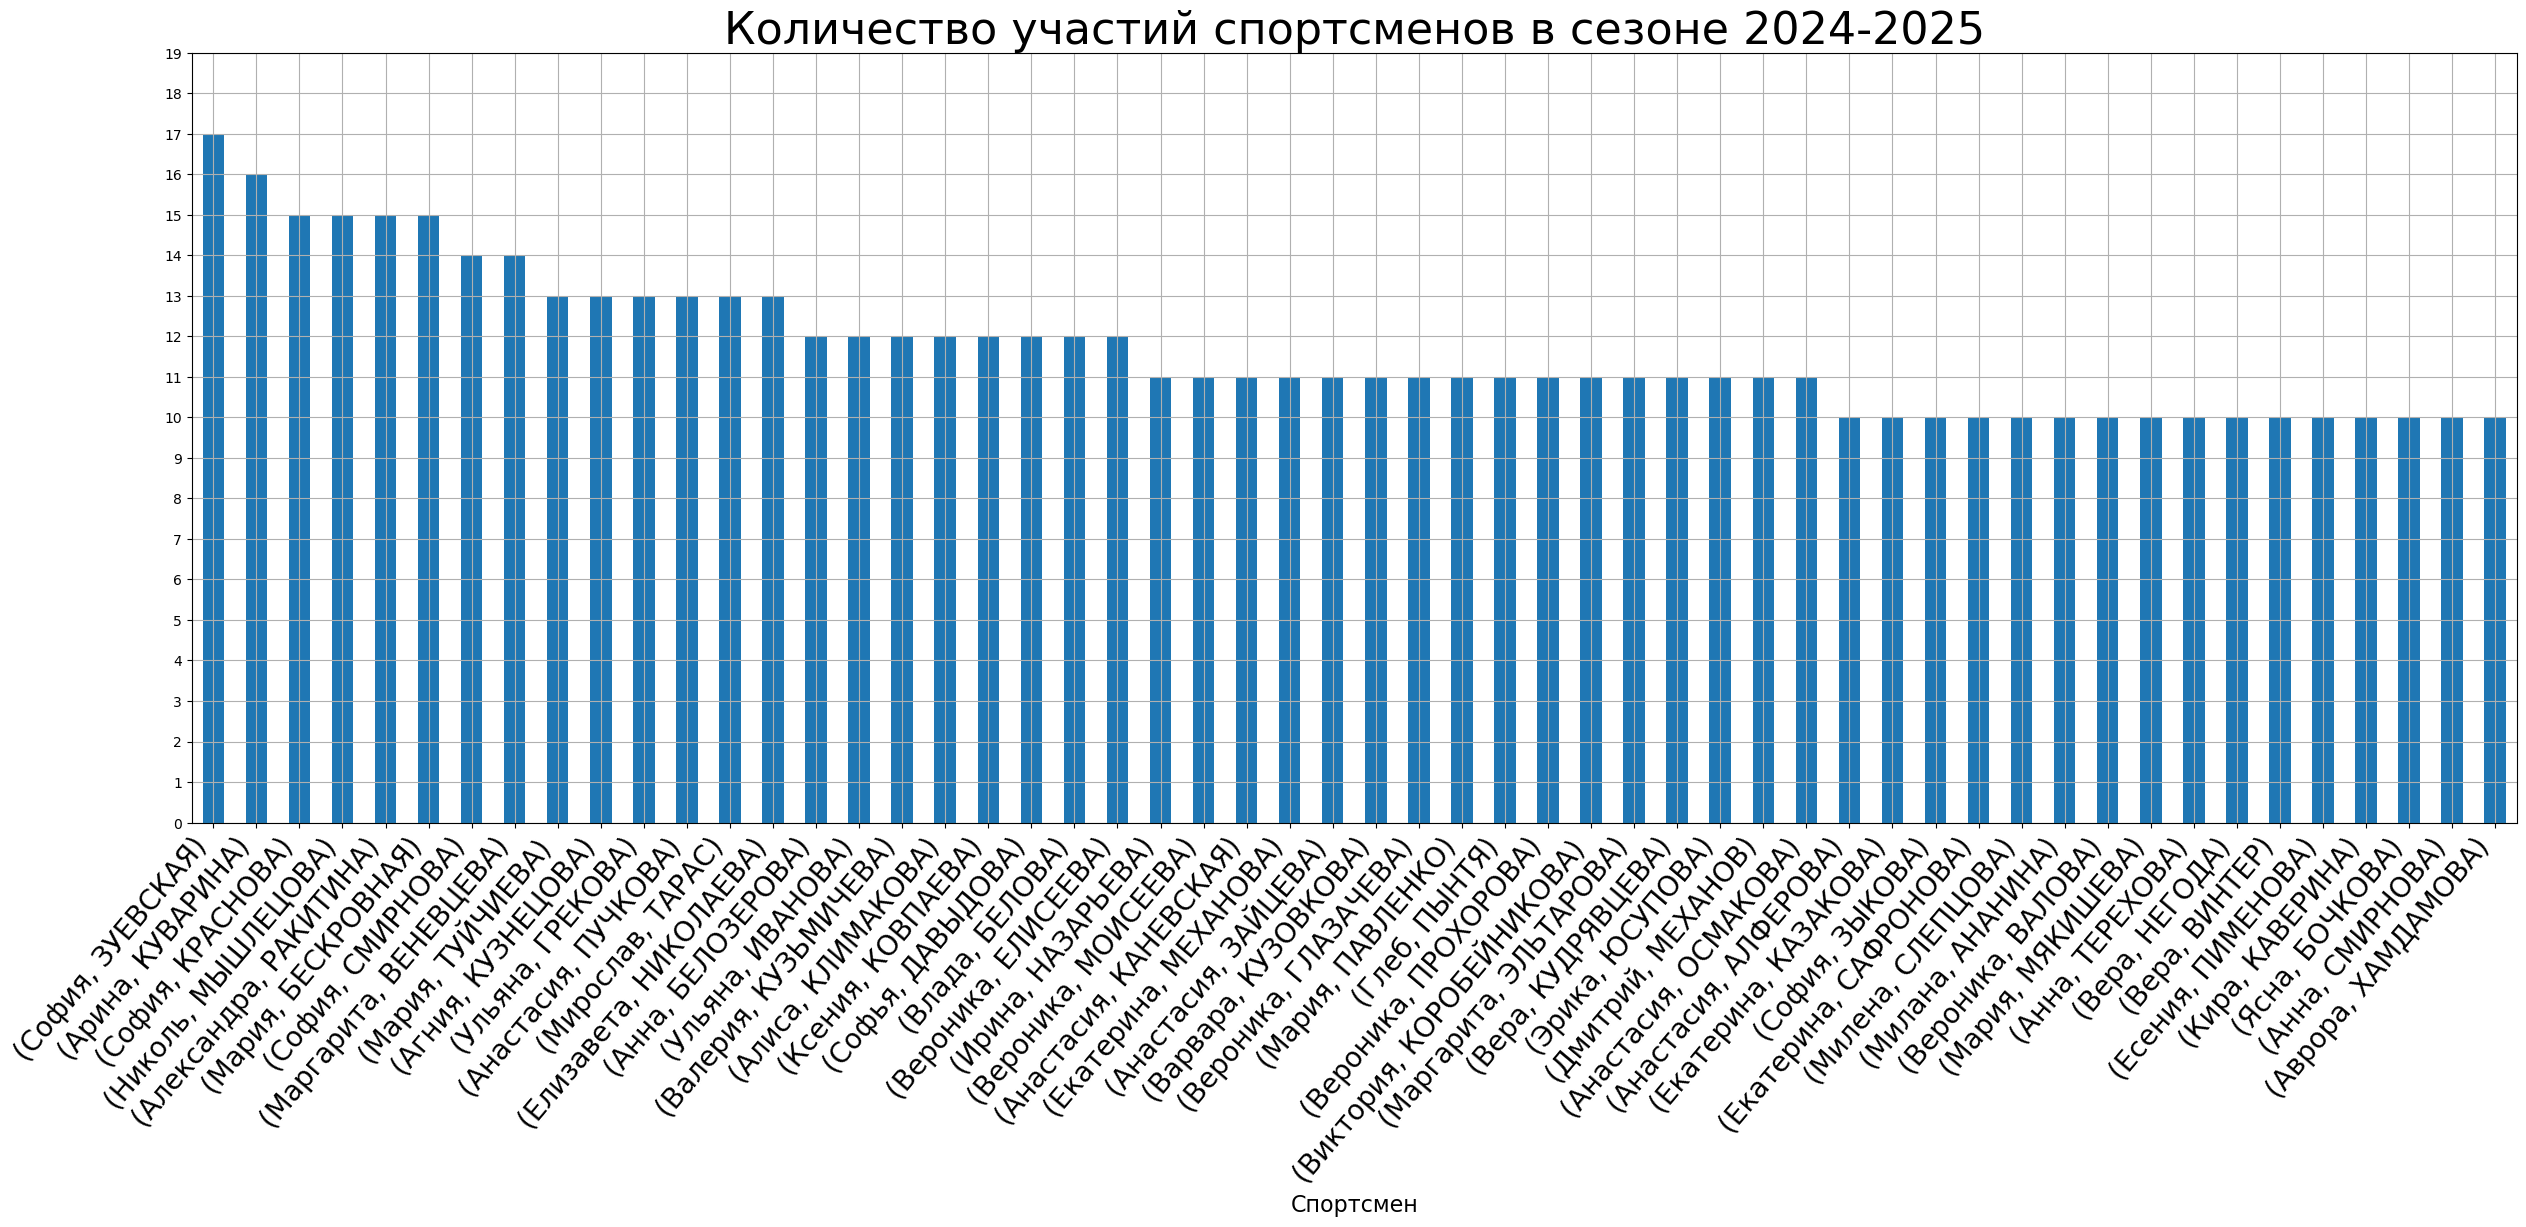

In [11]:
data = df[(df['segment']=='Произвольная программа') & (df['season']==2425)].groupby(['firstname', 'lastname']).count().sort_values(
    by='date', ascending=False).head(54)['date']
ax = data.plot(
    kind='bar', figsize=(30, 10), grid=True
)
major_ticks = np.arange(0, max(data) + 3, 1)
ax.set_yticks(major_ticks)
plt.title("Количество участий спортсменов в сезоне 2024-2025", fontsize=32)
plt.xlabel('Спортсмен', fontsize=16)
plt.ylabel(f'', fontsize=18)
plt.xticks(fontsize=20, rotation=50, horizontalalignment='right');

In [12]:
df[df['category'].isin(categoies)&(df['season']==2425)].sort_values(by="tss").groupby(["category", "segment"]).last()[['club', 'date', 'firstname', 'lastname', 'tss', 'tes', 'pcs']]

club  \
category                        segment                                                                 
1-й спортивный разряд, девочки  Короткая программа           Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»   
                                Произвольная программа   Ленинский, ООО «Центр спортивных технологий»   
1-й спортивный разряд, мальчики Короткая программа                    Сергиев Посад, ООО «Стремление»   
                                Произвольная программа                Сергиев Посад, ООО «Стремление»   
1-й юношеский разряд, девочки   Произвольная программа        Ступино, МБУ ДО «СШОР им. В.Б. Боброва»   
1-й юношеский разряд, мальчики  Произвольная программа                Сергиев Посад, ООО «Стремление»   
2-й спортивный разряд, девочки  Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
2-й спортивный разряд, мальчики Короткая программа                  Раменское, МБУ ДО «СШ «Раменское»   
                                Произвольная программа                 Лыткарино, МАУ «ЛСК Лыткарино»   
2-й юношеский разряд, девочки   Произвольная программа                  Мытищи, МБУ ДО «СШ «Авангард»   
2-й юношеский разряд, мальчики  Произвольная программа       Долгопрудный, АНО ДО СШФК «Смирнова Тим»   
3-й спортивный разряд, девочки  Произвольная программа                  Подольск, МУ ДО СШОР «Витязь»   
3-й спортивный разряд, мальчики Произвольная программа                            Люберцы, МУДО КСШОР   
3-й юношеский разряд, девочки   Произвольная программа         Красногорск, АНО ДО АФК «Наши Надежды»   
3-й юношеский разряд, мальчики  Произвольная программа       Долгопрудный, АНО ДО СШФК «Смирнова Тим»   
КМС, девушки                    Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
КМС, юноши                      Короткая программа               Одинцово, ООО «АФК «Ангелы Плющенко»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
МС, девушки                     Короткая программа               Одинцово, ООО «АФК «Ангелы Плющенко»   
                                Произвольная программа       Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»   
МС, юноши                       Короткая программа               Одинцово, ООО «АФК «Ангелы Плющенко»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
Младшая группа, девочки         Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа   Ленинский, ООО «Центр спортивных технологий»   
Младшая группа, мальчики        Короткая программа                     Одинцово, МБУ ДО СШ «Одинцово»   
                                Произвольная программа              Раменское, МБУ ДО «СШ «Раменское»   
Старшая группа, девочки         Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа   Ленинский, ООО «Центр спортивных технологий»   
Старшая группа, мальчики        Короткая программа                    Сергиев Посад, ООО «Стремление»   
                                Произвольная программа                Сергиев Посад, ООО «Стремление»   
Юный фигурист, девочки          Катание под музыку                             Химки, МАУ ДО «СШ ЗВС»   
                                Произвольная программа  Жуковский, МБУ ДО «СШ – Центр спорта «Метеор»   
Юный фигурист, мальчики         Катание под музыку                     Лыткарино, МАУ «ЛСК Лыткарино»   
                                Произвольная программа              Раменское, МБУ ДО «СШ «Раменское»   

                                                              date  firstname  \
category                 

In [13]:
df[(df['season']==2425)].groupby("category").count()['date']

category
1-й спортивный разряд, девочки      914
1-й спортивный разряд, мальчики      72
1-й юношеский разряд, девочки       455
1-й юношеский разряд, мальчики       27
2-й спортивный разряд, девочки     1323
2-й спортивный разряд, мальчики      50
2-й юношеский разряд, девочки       902
2-й юношеский разряд, мальчики       78
3-й спортивный разряд, девочки      759
3-й спортивный разряд, мальчики      65
3-й юношеский разряд, девочки       628
3-й юношеский разряд, мальчики       19
КМС, девушки                        102
КМС, юноши                           30
МС, девушки                           6
МС, юноши                            12
Младшая группа, девочки              59
Младшая группа, мальчики             10
Старшая группа, девочки              60
Старшая группа, мальчики              8
Юный фигурист, девочки              188
Юный фигурист, мальчики              16
Name: date, dtype: int64

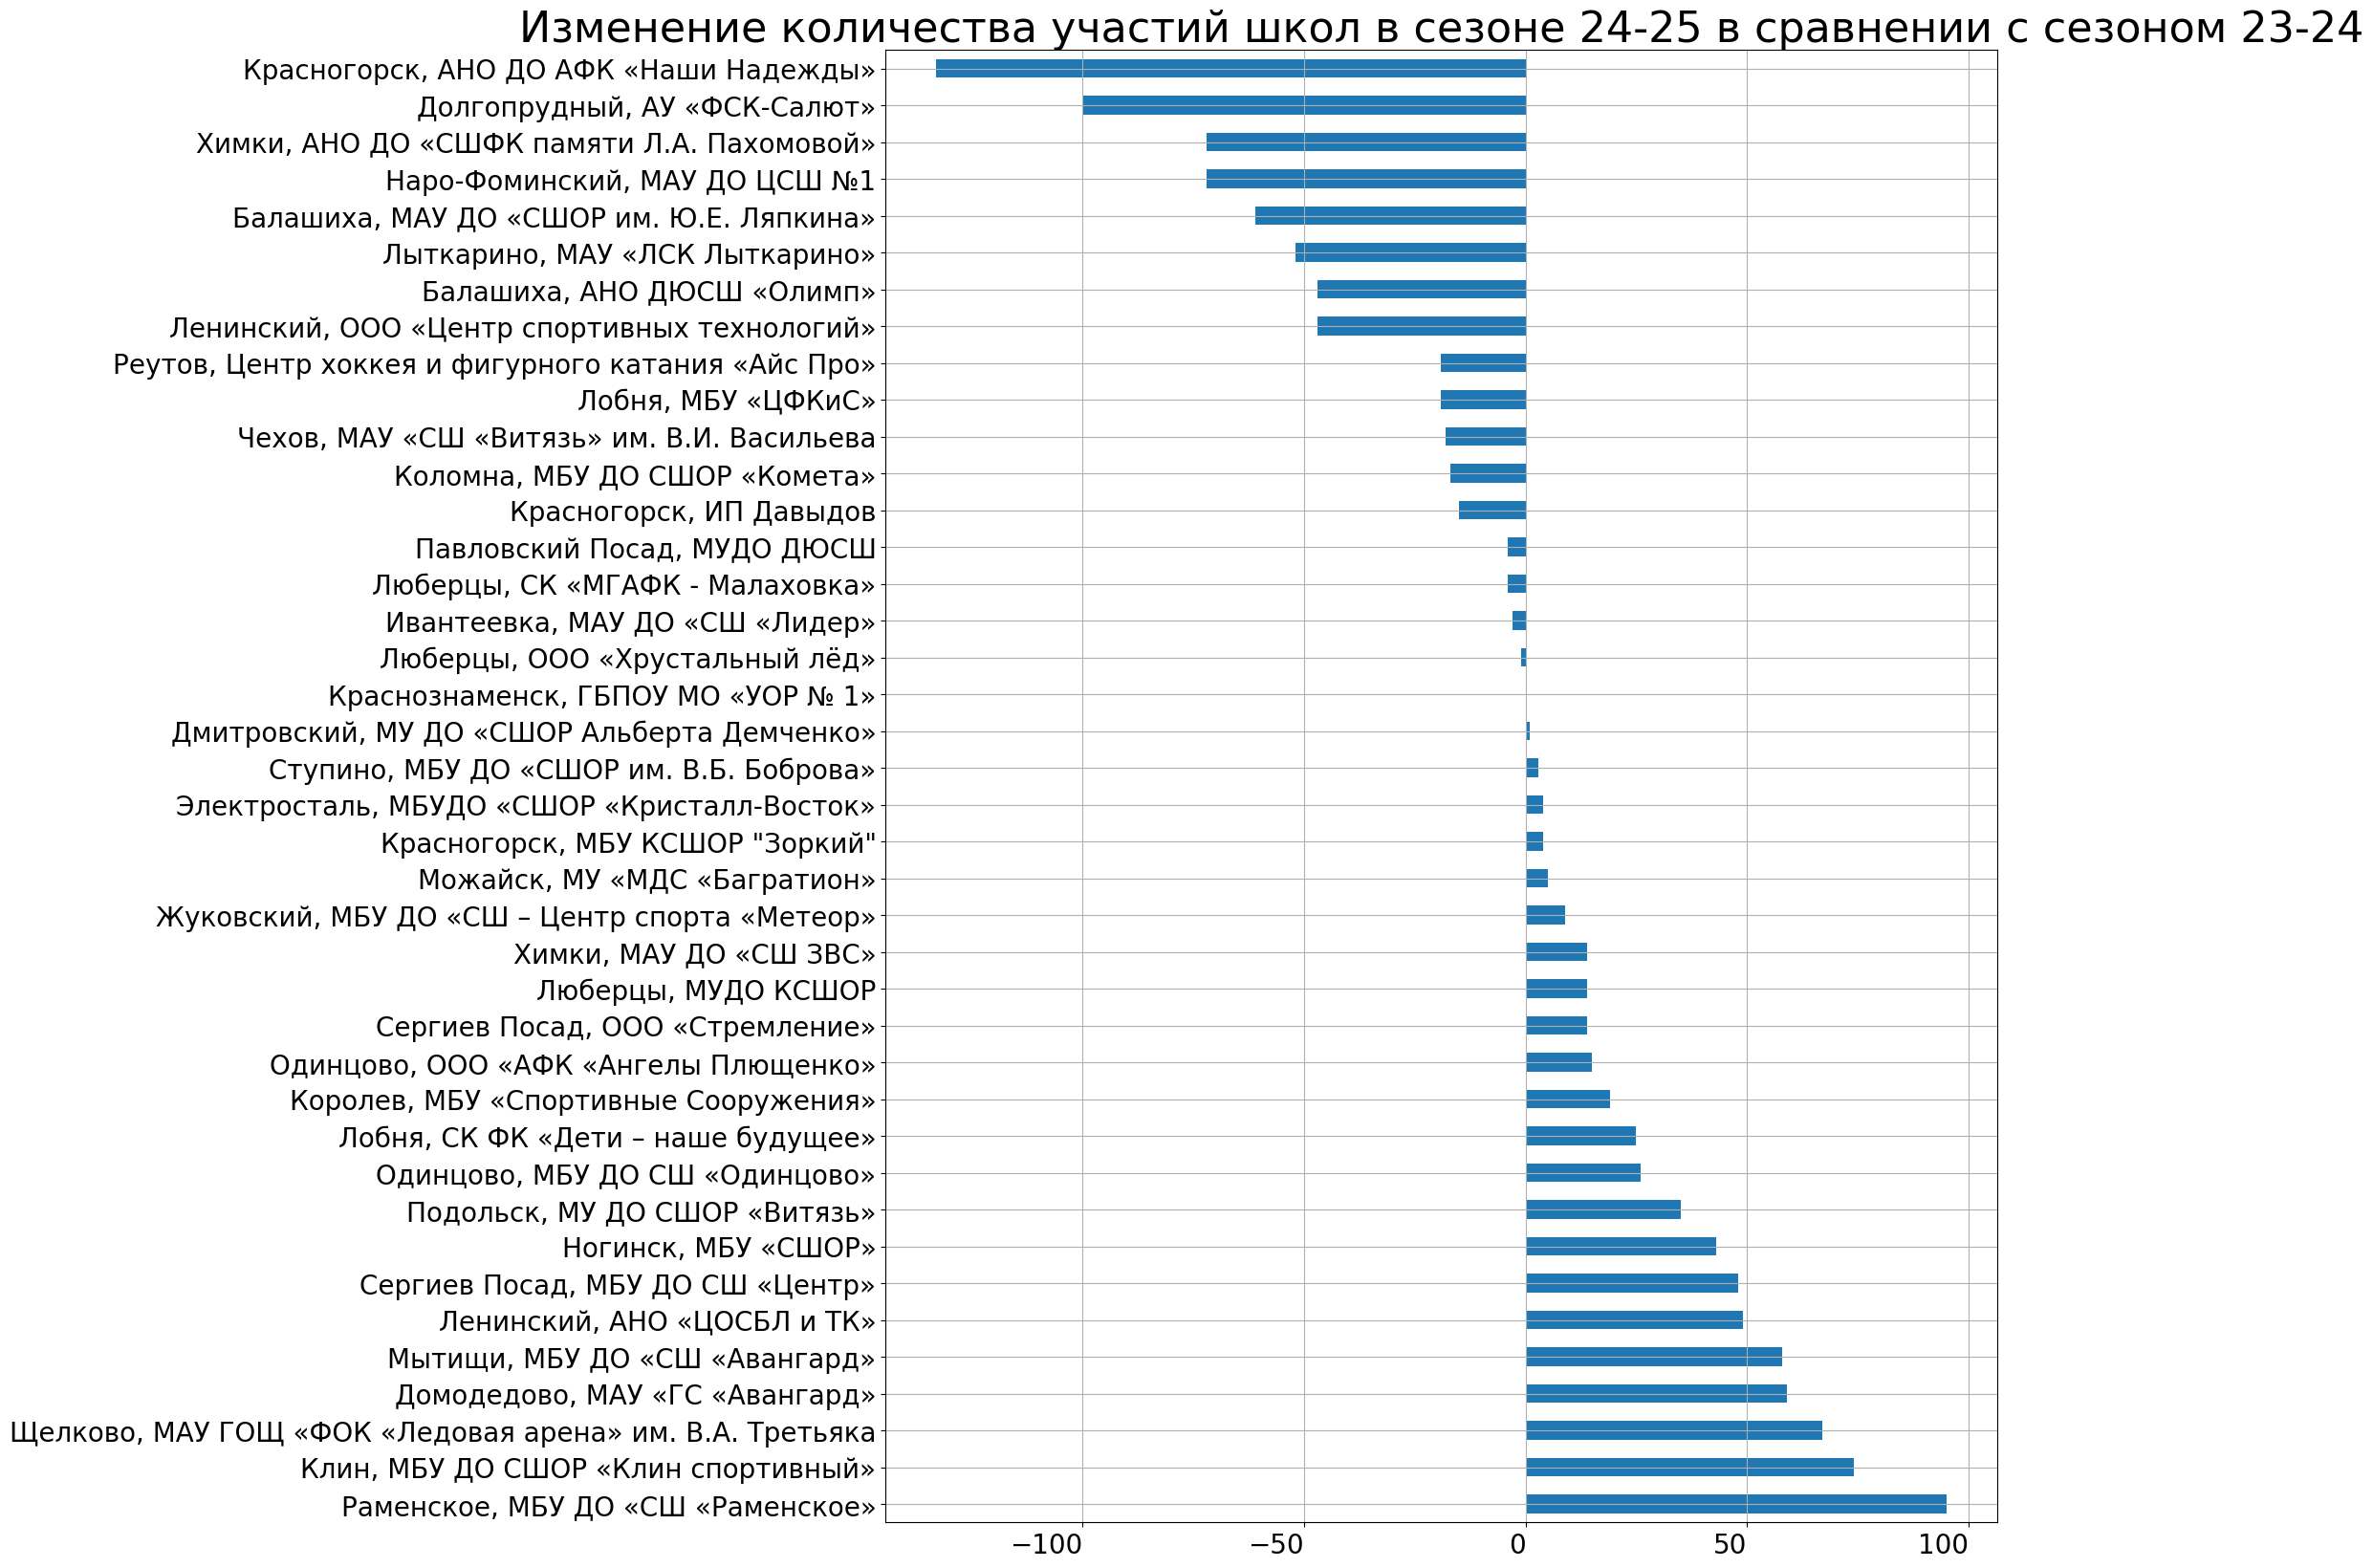

In [14]:
df_groupped = df.groupby(["firstname", "lastname", "date", "club", "season"]).last().reset_index()
pivot_df = pd.pivot_table(df_groupped, values='date', index='club', columns='season', aggfunc='count')
tdf = pivot_df[2425] - pivot_df[2324]
tdf = tdf.dropna()
tdf.sort_values(ascending=False).plot(
    kind='barh', figsize=(15, 20), grid=True
)
plt.title("Изменение количества участий школ в сезоне 24-25 в сравнении с сезоном 23-24", fontsize=32)
plt.ylabel(f'', fontsize=18)
plt.yticks(fontsize=20, rotation=0, horizontalalignment='right');
plt.xticks(fontsize=20, rotation=0, horizontalalignment='right');

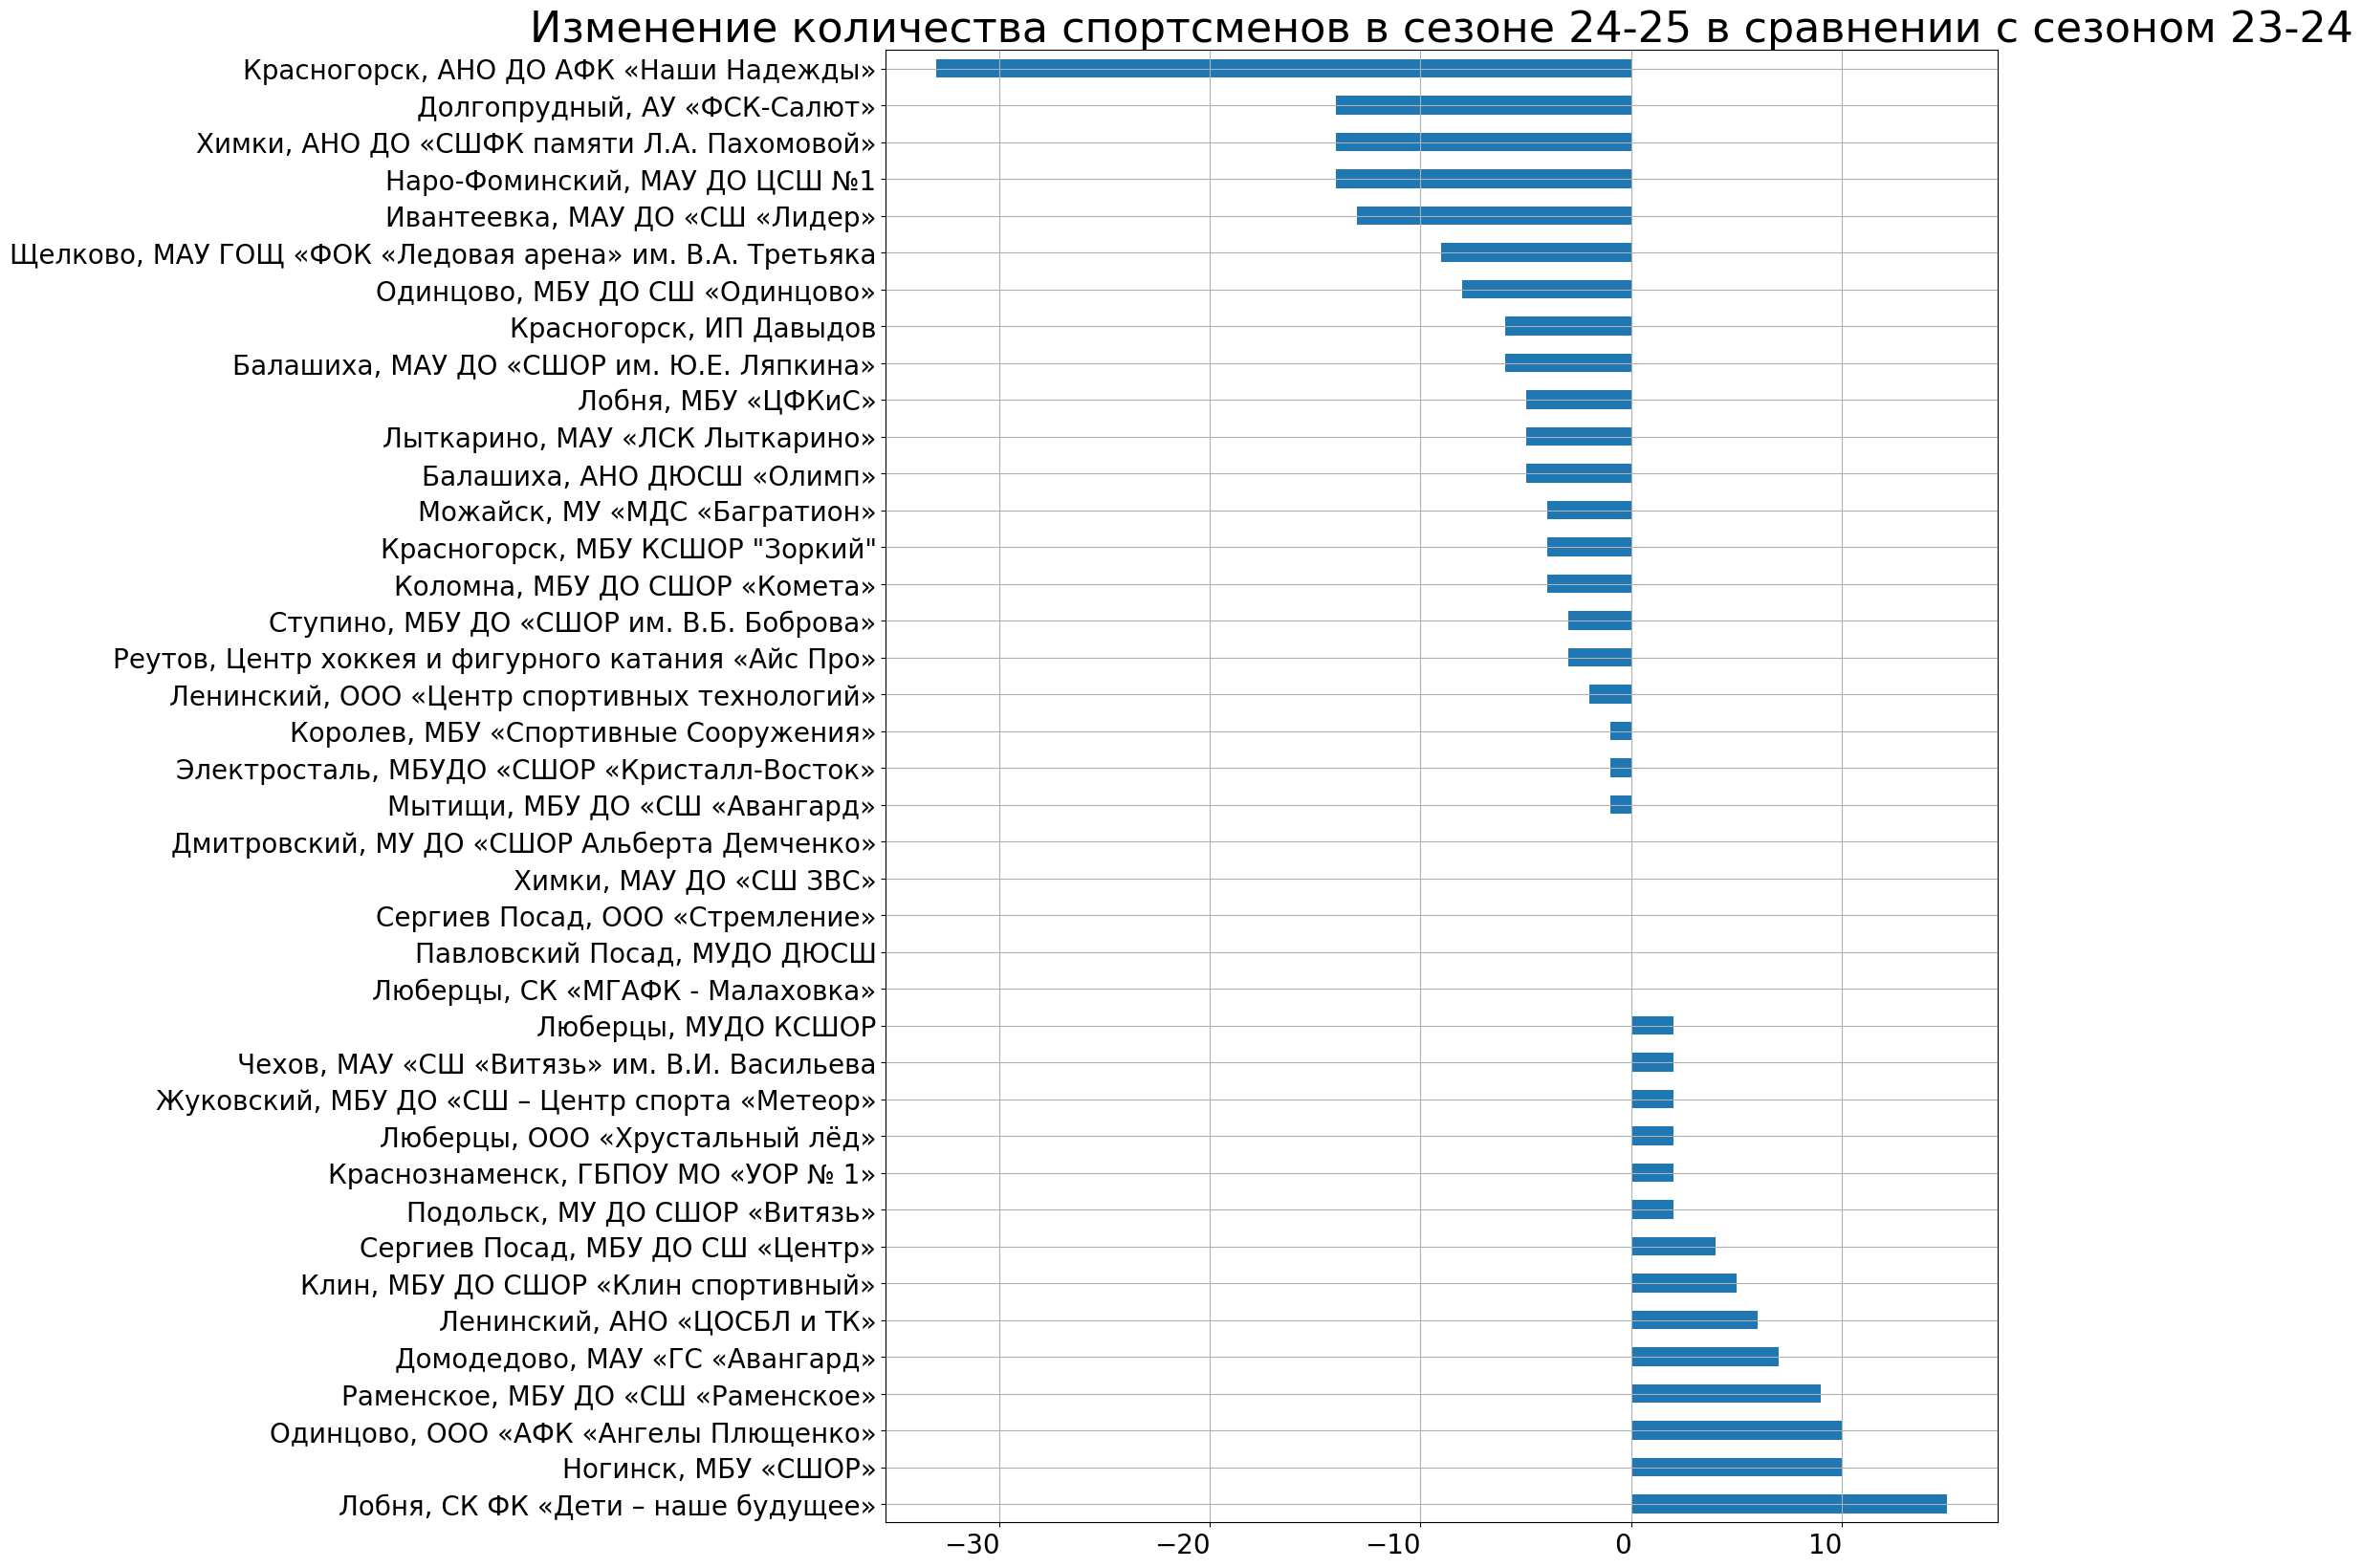

In [15]:
df_groupped = df.groupby(["firstname", "lastname", "club", "season"]).last().reset_index()
pivot_df = pd.pivot_table(df_groupped, values='date', index='club', columns='season', aggfunc='count')
tdf = pivot_df[2425] - pivot_df[2324]
tdf = tdf.dropna()
tdf.sort_values(ascending=False).plot(
    kind='barh', figsize=(15, 20), grid=True
)
plt.title("Изменение количества спортсменов в сезоне 24-25 в сравнении с сезоном 23-24", fontsize=32)
plt.ylabel(f'', fontsize=18)
plt.yticks(fontsize=20, rotation=0, horizontalalignment='right');
plt.xticks(fontsize=20, rotation=0, horizontalalignment='right');

In [16]:
pd.set_option('display.max_rows', 100)
display(pivot_df.sort_values(by=2425, ascending=False))

season                                               2021   2122   2223  \
club                                                                      
Наро-Фоминский, МАУ ДО ЦСШ №1                        39.0   40.0   81.0   
Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»             95.0   90.0   76.0   
Одинцово, МБУ ДО СШ «Одинцово»                      129.0  114.0  114.0   
Лыткарино, МАУ «ЛСК Лыткарино»                       76.0   73.0   63.0   
Раменское, МБУ ДО «СШ «Раменское»                    34.0   37.0   46.0   
Щелково, МАУ ГОЩ «ФОК «Ледовая арена» им. В.А. ...   66.0   60.0   56.0   
Мытищи, МБУ ДО «СШ «Авангард»                        65.0   62.0   49.0   
Химки, МАУ ДО «СШ ЗВС»                               37.0   38.0   52.0   
Химки, АНО ДО «СШФК памяти Л.А. Пахомовой»           42.0   45.0   54.0   
Красногорск, АНО ДО АФК «Наши Надежды»               22.0   58.0   69.0   
Ленинский, АНО «ЦОСБЛ и ТК»                          43.0   43.0   36.0   
Клин, МБУ ДО СШОР «Клин спортивный»                  29.0   24.0   21.0   
Сергиев Посад, МБУ ДО СШ «Центр»                     39.0   37.0   33.0   
Подольск, МУ ДО СШОР «Витязь»                        43.0   39.0   25.0   
Ленинский, ООО «Центр спортивных технологий»          NaN   33.0   29.0   
Люберцы, МУДО КСШОР                                  33.0   29.0   25.0   
Ступино, МБУ ДО «СШОР им. В.Б. Боброва»              33.0   30.0   29.0   
Долгопрудный, АУ «ФСК-Салют»                         57.0   59.0   46.0   
Жуковский, МБУ ДО «СШ – Центр спорта «Метеор»         5.0    5.0   22.0   
Лобня, СК ФК «Дети – наше будущее»                   18.0   20.0   12.0   
Дмитровский, МУ ДО «СШОР Альберта Демченко»          30.0   36.0   29.0   
Ногинск, МБУ «СШОР»                                   2.0    9.0   13.0   
Балашиха, АНО ДЮСШ «Олимп»                           14.0   27.0   22.0   
Красногорск, МБУ КСШОР "Зоркий"                      64.0   47.0   32.0   
Ивантеевка, МАУ ДО «СШ «Лидер»                       39.0   25.0    8.0   
Чехов, МАУ «СШ «Витязь» им. В.И. Васильева           19.0   21.0   17.0   
Павловский Посад, МУДО ДЮСШ                          26.0   37.0   21.0   
Наро-Фоминск, ООО СКФК «Галактика»                    NaN    NaN    NaN   
Долгопрудный, АНО ДО СШФК «Смирнова Тим»              NaN    NaN    NaN   
Электросталь, МБУДО «СШОР «Кристалл-Восток»          12.0   13.0   21.0   
Орехово-Зуево, МУДО «СШ «Спартак Орехово»             NaN    NaN    NaN   
Одинцово, ООО «АФК «Ангелы Плющенко»                  NaN    NaN    3.0   
Реутов, Центр хоккея и фигурного катания «Айс Про»    8.0   17.0   19.0   
Домодедово, МАУ «ГС «Авангард»                        NaN    NaN    NaN   
Королев, МБУ «Спортивные Сооружения»                 42.0   20.0   22.0   
Сергиев Посад, ООО «Хрустальный лед»                 10.0    8.0   11.0   
Люберцы, ООО «Хрустальный лёд»                        2.0   15.0    5.0   
Сергиев Посад, ООО «Стремление»                       NaN    NaN    NaN   
Краснознаменск, ГБПОУ МО «УОР № 1»                    NaN    NaN    NaN   
Коломна, МБУ ДО СШОР «Комета»                         6.0    6.0   16.0   
Жуковкий, МБУ ДО «СШ – ЦС «Метеор»                    NaN    NaN    NaN   
Можайск, МУ «МДС «Багратион»                          1.0    5.0    NaN   
Лобня, МБУ «ЦФКиС»                                   14.0   16.0    9.0   
Мытищи, СК “Ледовая Феерия”                           NaN    NaN    NaN   
Мытищи, СК «Ледовая Феерия»                           NaN    NaN    NaN   
Красногорск, ИП Давыдов                               NaN   23.0   26.0   
Люберцы, СК «МГАФК - Малаховка»                       NaN    NaN    NaN   
МАУ ДО СШ "Авангард"                                  NaN    NaN    NaN   
Балашиха, СКФК «Голден Стар»                          9.0    NaN    NaN   
Дмитровский, ИП Карпенко                              NaN    8.0    7.0   
Долгопрудный, СК «Альфа»                             22.0    NaN    NaN   
Домодедово, ИП Спицин    

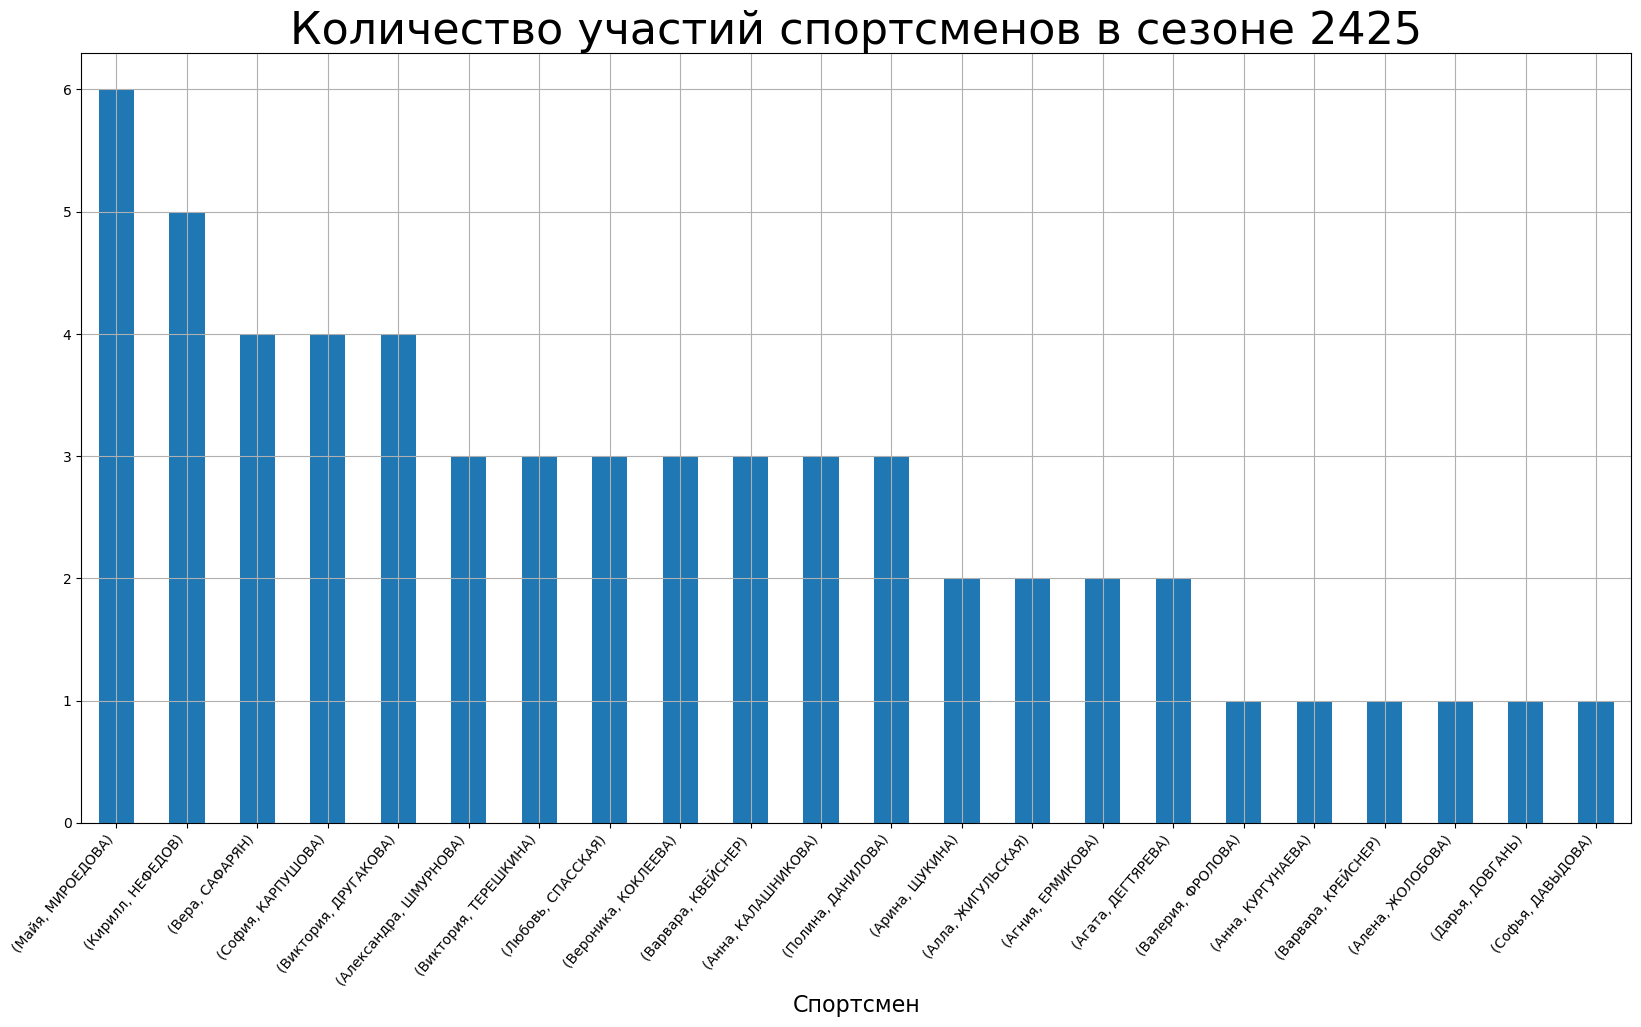

In [17]:
ffkkmo_ra.participants_of_club_in_season(df, club.value, season.value)

In [18]:
def participants_of_club_in_season(df, club, season):
    data = (
        ffkkmo_ra.get_df_of_club_in_season(df, club, season)
        .groupby(["date", "firstname", "lastname"])
        .last()
        .reset_index()
        .groupby(["firstname", "lastname"])
        .count()
        .sort_values(by=["date", "lastname"], ascending=False)["club"]
    )
    ax = data.plot(kind="bar", figsize=(20, 10), grid=True)
    major_ticks = np.arange(0, max(data) + 1, 1)
    ax.set_yticks(major_ticks)
    plt.title(f"Количество участий спортсменов в сезоне {season}", fontsize=32)
    plt.xlabel("Спортсмен", fontsize=16)
    plt.ylabel(f"", fontsize=18)
    plt.xticks(fontsize=10, rotation=50, horizontalalignment="right")

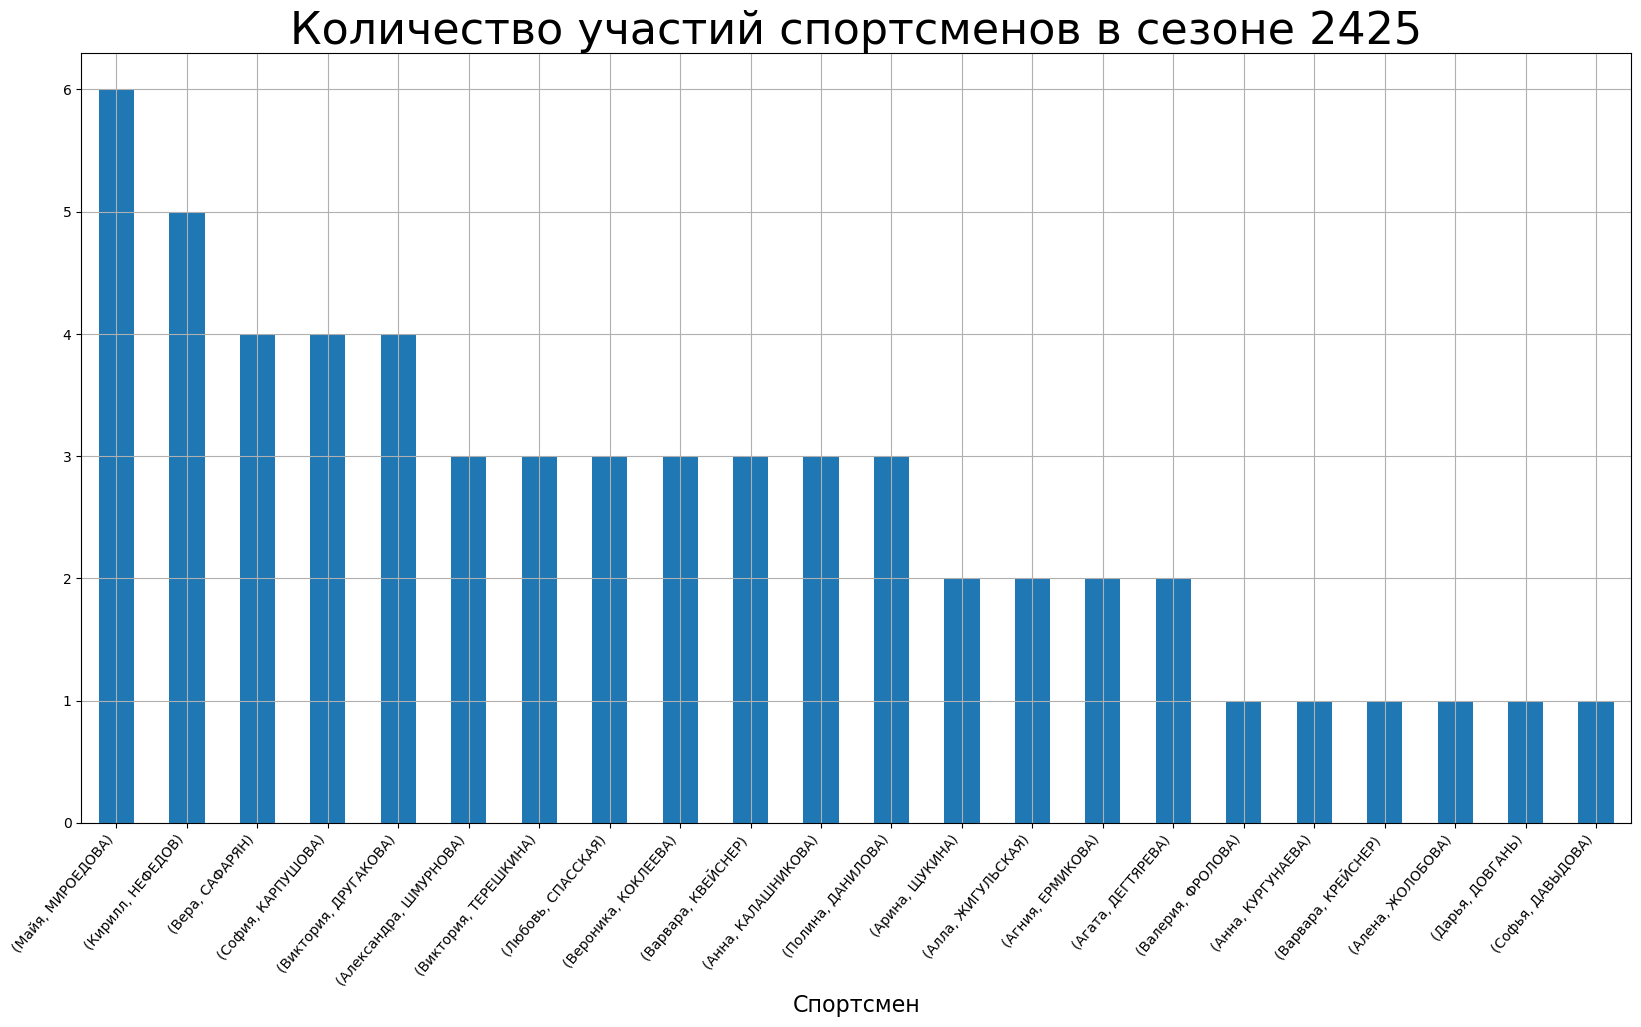

In [19]:
participants_of_club_in_season(df, club.value, season.value)

<Axes: >

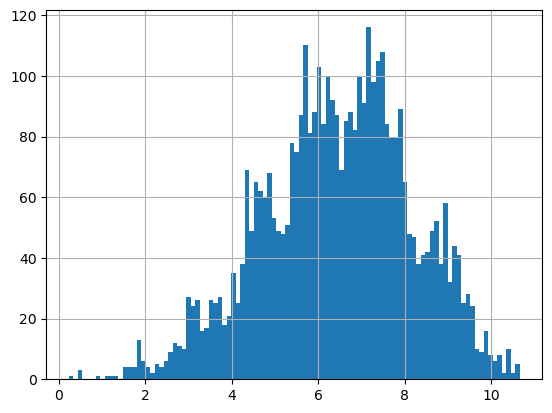

In [20]:
df[(df['category'] == '3-й юношеский разряд, девочки')]['tes'].hist(bins=100)

In [21]:
tes_min = dict(zip([(x[0], x[1]) for x in ffkkmo_ra.sorter_names], [(x[2]) for x in ffkkmo_ra.sorter_names]))

In [22]:
def calc_procentage(x):
    return len(list(filter(lambda y : y > avg(x[1]), x[0]))) / len(x[0]) * 100

In [23]:
for x in tes_min:
    df.loc[(df['category'] == x[0]) & (df['segment'] == x[1]), 'tes_min'] = tes_min[x]
df['tes_done'] = df['tes'] >= df['tes_min']

In [24]:
df_spec = df_judges[df_judges['function'] == 'Технический специалист'].groupby(['date', 'online']).first()
df_spec = df_spec.rename(columns={"name": "ts"})
df_cont = df_judges[df_judges['function'] == 'Технический контролер'].groupby(['date', 'online']).first()
df_cont = df_cont.rename(columns={"name": "tc"})

In [25]:
tes_done_stat = df[df['season'] == 2425].groupby(['club'])['tes_done'].agg(['sum', 'count'])
tes_done_stat['ratio'] = (tes_done_stat['sum']/tes_done_stat['count'])
tes_done_stat = tes_done_stat[tes_done_stat['count'] > 10].sort_values(by='ratio', ascending=False)
tes_done_stat['percentage'] = tes_done_stat['ratio'].apply(lambda x: str(round(x*100, 2)) + '%')

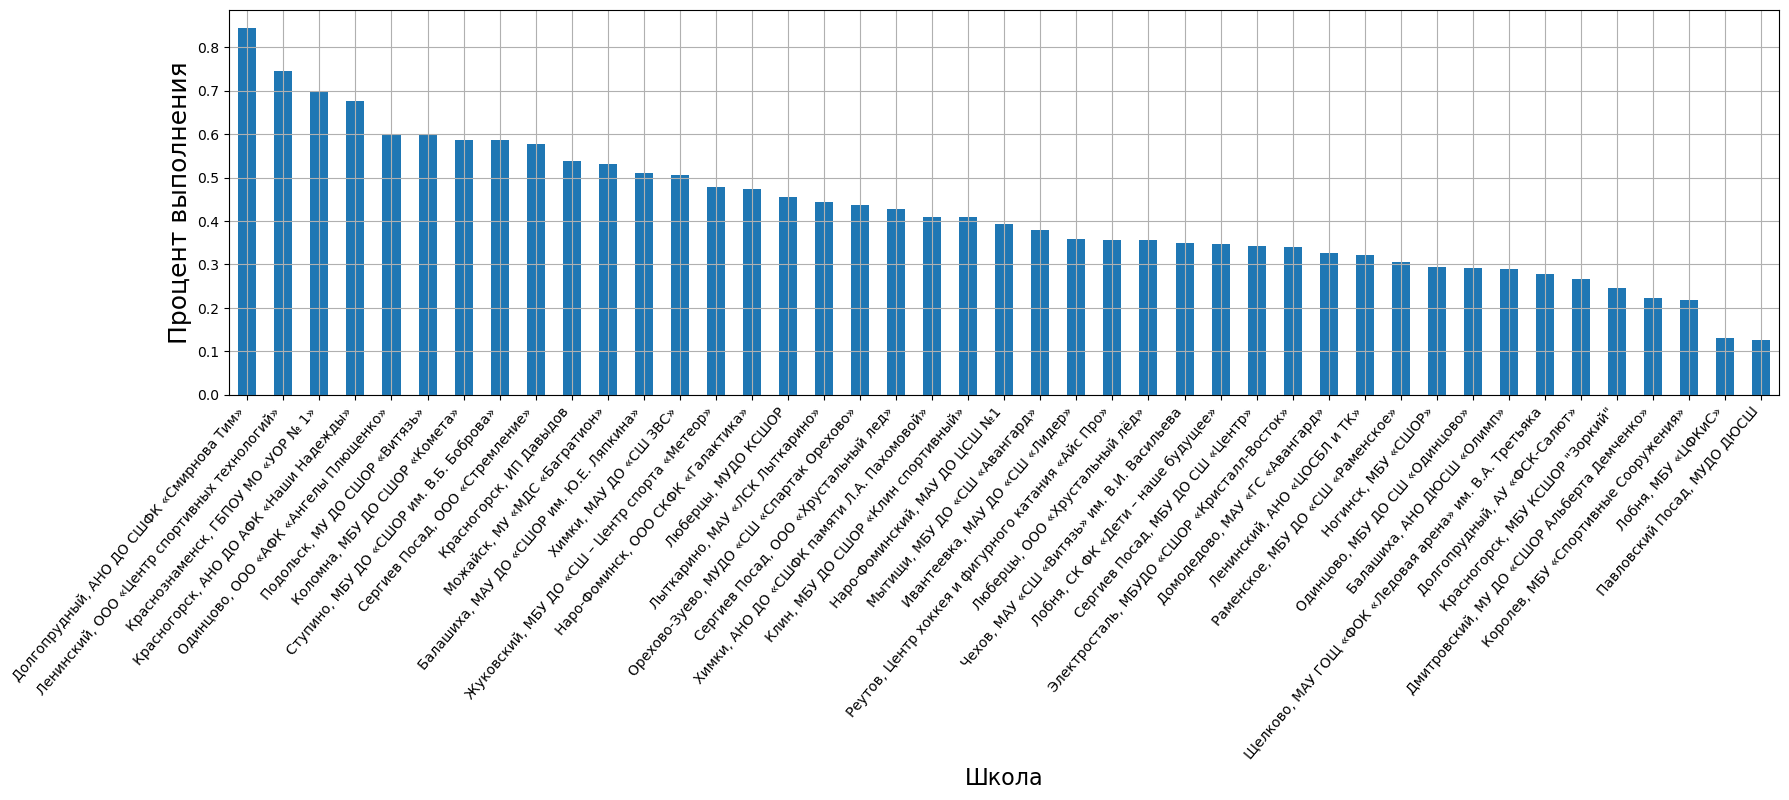

In [26]:
tes_done_stat['ratio'].plot(kind='bar', figsize=(20, 5), grid=True)
plt.xlabel("Школа", fontsize=16)
plt.ylabel(f"Процент выполнения", fontsize=18)
plt.xticks(fontsize=10, rotation=50, horizontalalignment="right");

In [27]:
df_judges = df_judges.groupby(['date', 'name']).first().reset_index()

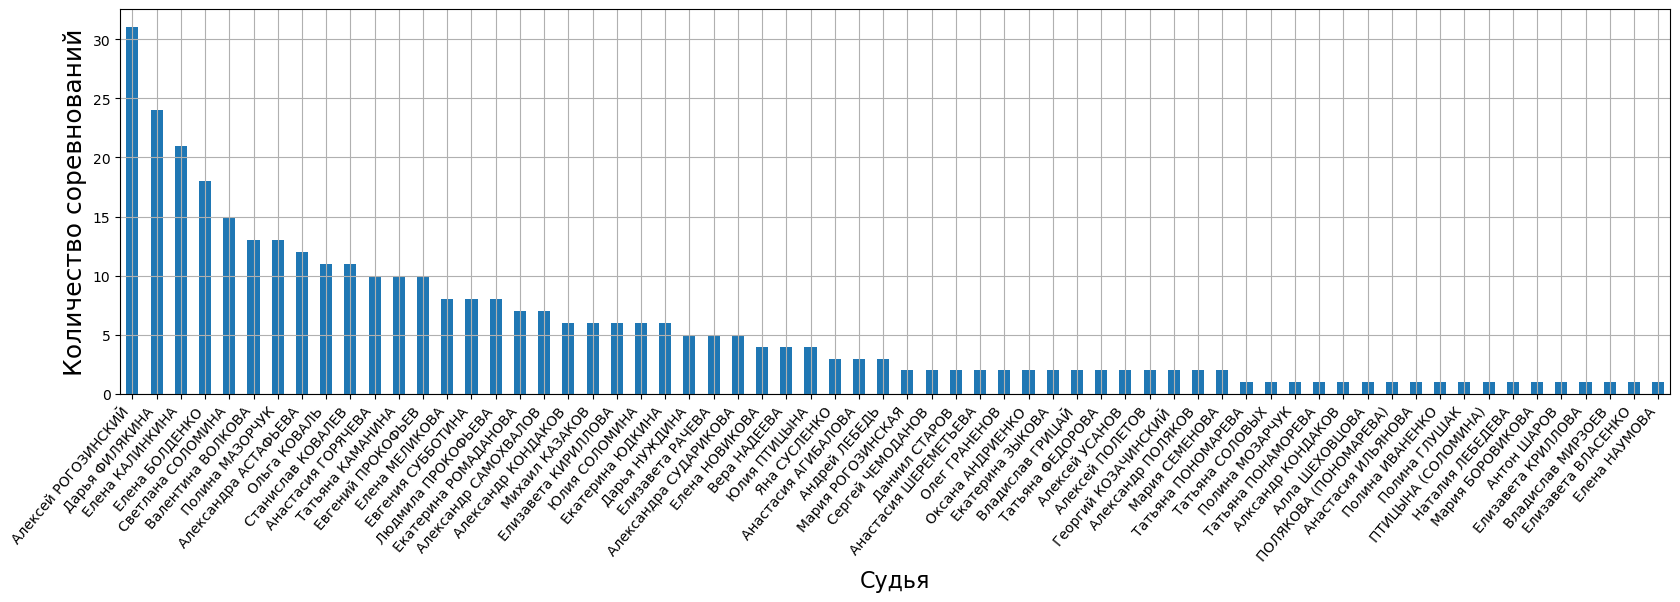

In [28]:
(
    df_judges[df_judges['season'] == 2425]
    .groupby('name')
    .count()
    .sort_values(by='function', ascending=False)['function']
    .plot(kind='bar', grid=True, figsize=(20, 5))
)
plt.xlabel("Судья", fontsize=16)
plt.ylabel(f"Количество соревнований", fontsize=18)
plt.xticks(fontsize=10, rotation=50, horizontalalignment="right");

In [31]:
df[df['lastname'] == 'АБРАМОВА']

date                                              place  \
7509   2021-11-27  г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»   
7531   2021-11-27  г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»   
13380  2022-09-24                   г.о. Лыткарино, ул. Советская 9А   
13387  2022-09-24                   г.о. Лыткарино, ул. Советская 9А   
13709  2022-10-15                   г.о. Лыткарино, ул. Советская 9А   
13713  2022-10-15                   г.о. Лыткарино, ул. Советская 9А   
15379  2023-01-14                   г.о. Лыткарино, ул. Советская 9А   
15403  2023-01-14                   г.о. Лыткарино, ул. Советская 9А   
15735  2023-02-04                   г.о. Лыткарино, ул. Советская 9А   
15739  2023-02-04                   г.о. Лыткарино, ул. Советская 9А   
17013  2023-03-25                  г.о. Лыткарино, ул. Советская, 9А   
17015  2023-03-25                  г.о. Лыткарино, ул. Советская, 9А   
17581  2023-04-07        г. Ивантеевка, ул. Победы д.2, МАУ СК Лидер   
17589  2023-04-07        г. Ивантеевка, ул. Победы д.2, МАУ СК Лидер   
28138  2025-02-15   г. Ивантеевка, ул. Победы, д. 2, ФОК ЛСК "Лидер"   
28141  2025-02-15   г. Ивантеевка, ул. Победы, д. 2, ФОК ЛСК "Лидер"   
30822  2025-05-24   г. Электросталь, ул. Радио, д. 3, ЛДС "Кристалл"   
30823  2025-05-24   г. Электросталь, ул. Радио, д. 3, ЛДС "Кристалл"   

                                            online  \
7509   http://ffkkmo.ru/events/2122/lytkarino1127/   
7531   http://ffkkmo.ru/events/2122/lytkarino1127/   
13380  http://ffkkmo.ru/events/2223/lytkarino0924/   
13387  http://ffkkmo.ru/events/2223/lytkarino0924/   
13709  http://ffkkmo.ru/events/2223/lytkarino1015/   
13713  http://ffkkmo.ru/events/2223/lytkarino1015/   
15379    http://ffkkmo.ru/events/2223/lytkarino01/   
15403    http://ffkkmo.ru/events/2223/lytkarino01/   
15735    http://ffkkmo.ru/events/2223/lytkarino02/   
15739    http://ffkkmo.ru/events/2223/lytkarino02/   
17013    http://ffkkmo.ru/events/2223/lytkarino03/   
17015    http://ffkkmo.ru/events/2223/lytkarino03/   
17581          http://ffkkmo.ru/events/2223/pmo23/   
17589          http://ffkkmo.ru/events/2223/pmo23/   
28138        http://ffkkmo.ru/events/2425/iva1516/   
28141        http://ffkkmo.ru/events/2425/iva1516/   
30822           http://ffkkmo.ru/events/2425/el05/   
30823           http://ffkkmo.ru/events/2425/el05/   

                             category                 segment  rank  \
7509   2-й спортивный разряд, девочки      Короткая программа     6   
7531   2-й спортивный разряд, девочки  Произвольная программа     2   
13380  1-й спортивный разряд, девочки      Короткая программа     2   
13387  1-й спортивный разряд, девочки  Произвольная программа     3   
13709  1-й спортивный разряд, девочки      Короткая программа     7   
13713  1-й спортивный разряд, девочки  Произвольная программа     4   
15379  1-й спортивный разряд, девочки      Короткая программа     5   
15403  1-й спортивный разряд, девочки  Произвольная программа     8   
15735                    КМС, девушки      Короткая программа     3   
15739                    КМС, девушки  Произвольная программа     3   
17013                    КМС, девушки      Короткая программа     2   
17015                    КМС, девушки  Произвольная программа     2   
17581                    КМС, девушки      Короткая программа     5   
17589                    КМС, девушки  Произвольная программа     6   
28138                    КМС, девушки      Короткая программа     3   
28141                    КМС, девушки  Произвольная программа     3   
30822                    КМС, девушки      Короткая программа     1   
30823                    КМС, девушки  Произвольная программа     1   

       firstname middlename  lastname                            club    tss  \
7509        Анна        NaN  АБРАМОВА          Химки, МАУ ДО «СШ ЗВС»  34.42   
7531        Анна        NaN  АБРАМОВА          Химки, МАУ ДО «СШ ЗВС»  65.11   
13380  Екатерина        NaN